In [2]:
# 1. Импорты
import pandas as pd

from src.evaluation.comparison import compare_models
from src.evaluation.plots import plot_roc_curve, plot_pr_curve, pr_curve_points, plot_proba_hist
from src.evaluation.metrics import classification_metrics
from src.utils.config import ML_TRAINING_DATASET_PATH
from src.ml.ranking_model import load_ranking_model
from catboost import Pool

In [3]:
# 2. Сравнение ML vs rule-based
compare_models()

,roc_auc,log_loss,accuracy@0.5,average_precision
model,,,,
ml_model,0.770907,0.507945,0.758987,0.602696
rule_based,0.528622,0.605276,0.705023,0.315207


In [4]:
# 3. Подробные графики для ML-модели
df = pd.read_csv(ML_TRAINING_DATASET_PATH)
feature_cols = [c for c in df.columns if c != "conversion"]
cat_features = [c for c in feature_cols if df[c].dtype == "object"]
cat_indices = [feature_cols.index(c) for c in cat_features]

model = load_ranking_model()
pool = Pool(df[feature_cols], label=df["conversion"], cat_features=cat_indices)
y_true = df["conversion"]
y_proba = model.predict_proba(pool)[:, 1]

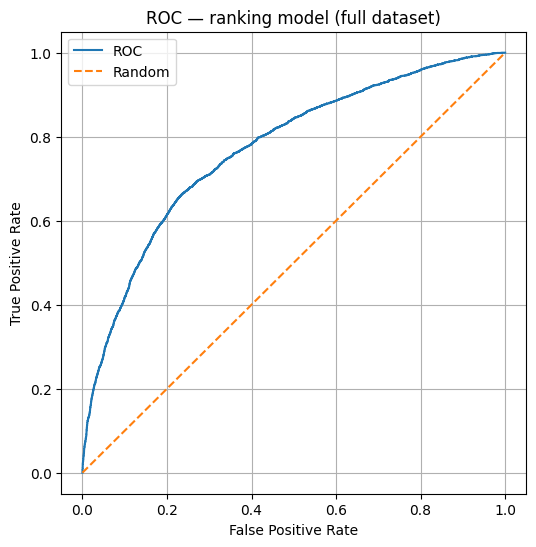

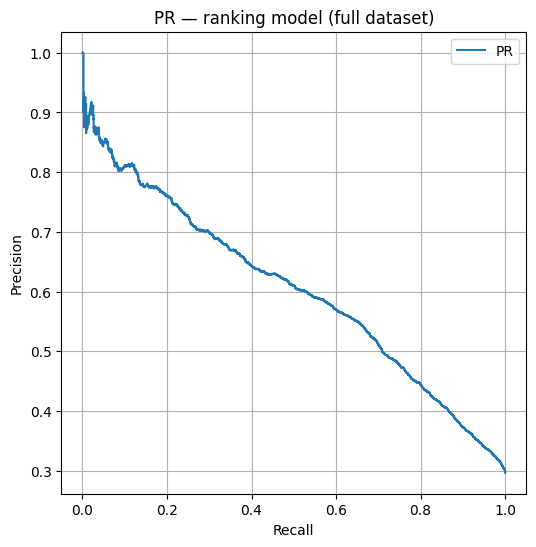

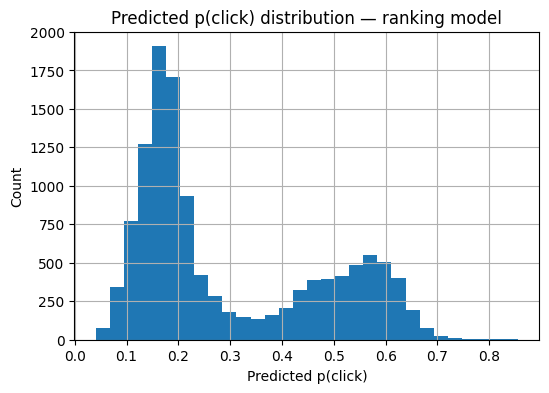

In [5]:
# 4. ROC / PR / гистограмма
plot_roc_curve(y_true, y_proba, title="ROC — ranking model (full dataset)")
precision, recall, _ = pr_curve_points(y_true, y_proba)
plot_pr_curve(precision, recall, title="PR — ranking model (full dataset)")
plot_proba_hist(y_proba, title="Predicted p(click) distribution — ranking model")